In [2]:
from astropy.coordinates import SkyCoord
from astropy import units as u
import regions
from astropy.table import Table
import re
import numpy as np



def get_number_after_hash(name):
    match = re.search(r'#(\d+)', name)
    if match:
        return str(int(match.group(1)))
    else:
        return None 
        
def extract_sort_key(name):
    # Extract prefix before #
    prefix_match = re.match(r'(.*)#(\d+)', name)
    if prefix_match:
        prefix = prefix_match.group(1)
        number = int(prefix_match.group(2))
        return (prefix, number)
    else:
        return (name, -1)  # fallback if no match
sheet_id = '1FRTQynXdrCuc-uwGIOKizEnDhFVoe9d7IuZ0CFuWIJ8'
sheet_name = 'Sheet1'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid=0"
tb = Table.read(url, format='ascii.csv')
region_name = tb['region_name']
alma_band = tb['alma_band']
jwst_filt = tb['jwst_filter']

alma_overlap_list = [str(name) for name in region_name if str(name).startswith('alma_overlap')]
alma_overlap_list_sorted = sorted(alma_overlap_list, key=extract_sort_key)

sort_keys = [extract_sort_key(name) for name in alma_overlap_list]
sorting_index = sorted(range(len(alma_overlap_list)), key=lambda i: sort_keys[i])
alma_band_overlap = [str(alma_band[region_name == name][0]) for name in alma_overlap_list]
jwst_filt_overlap = [str(jwst_filt[region_name == name][0]) for name in alma_overlap_list]
print(sorting_index)
alma_band_sorted = [alma_band_overlap[i] for i in sorting_index]
jwst_filt_sorted = [jwst_filt_overlap[i] for i in sorting_index]


print(alma_overlap_list_sorted)
print(alma_band_sorted)
print(jwst_filt_sorted)

print(len(alma_overlap_list_sorted))
print(len(alma_band_sorted))
print(len(jwst_filt_sorted))





[1, 0, 10, 4, 5, 3, 2, 9, 8, 7, 6, 19, 15, 17, 18, 20, 11, 16, 14, 13, 21, 12]
['alma_overlap_w51e#3', 'alma_overlap_w51e#7', 'alma_overlap_w51e#36', 'alma_overlap_w51e#66', 'alma_overlap_w51e#67', 'alma_overlap_w51e#68', 'alma_overlap_w51e#76', 'alma_overlap_w51e#78', 'alma_overlap_w51e#93', 'alma_overlap_w51e#95', 'alma_overlap_w51e#106', 'alma_overlap_w51n#19', 'alma_overlap_w51n#22', 'alma_overlap_w51n#29', 'alma_overlap_w51n#30', 'alma_overlap_w51n#58', 'alma_overlap_w51n#59', 'alma_overlap_w51n#64', 'alma_overlap_w51n#66', 'alma_overlap_w51n#76', 'alma_overlap_w51n#87', 'alma_overlap_w51n#89']
['b6', 'b3', 'b3', 'b6', 'b6', 'b3', 'b3', 'b3', 'b6', 'b6', 'b6', 'b6', 'b3', 'b3', 'b3', 'b3', 'b3', 'b3', 'b3', 'b3', 'b3', 'b3']
['f480m', 'f480m', 'f162m', 'f480m', 'f480m', 'f210m', 'f480m', 'f360m', 'f360m', 'f210m', 'f210m', 'f140m', 'f360m', 'f210m', 'f210m', 'f480m', 'f480m', 'f360m', 'f360m', 'f360m', 'f210m', 'f480m']
22
22
22


In [3]:
region_dir = '/home/t.yoo/w51/w51_jwst_sources_highlight/regions/'  # region files named after alma_overlap_list_sorted
reglist_for_save = []
for region_name in alma_overlap_list_sorted:
    regfile = f"{region_dir}/{region_name}.reg"
    reg = regions.Regions.read(regfile)[0]
    reglist_for_save.append(reg)
reglist_for_save = regions.Regions(reglist_for_save)
reglist_for_save.write(f"{region_dir}/alma_overlap.reg", format='ds9', overwrite=True)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


6.829458288848782 5.0046760588892 -45.90349197388
25.000000000002498


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


9.442004774299301 5.97718145166308 -44.76537322998
14.285714285717551
9.442004774299301 5.97718145166308 -44.76537322998


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


14.285714285717551
6.829458288848782 5.0046760588892 -45.90349197388


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


25.000000000002498
6.829458288848782 5.0046760588892 -45.90349197388


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


25.000000000002498
9.442004774299301 5.97718145166308 -44.76537322998


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


14.285714285717551
9.442004774299301 5.97718145166308 -44.76537322998


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


14.285714285717551
9.442004774299301 5.97718145166308 -44.76537322998


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


14.285714285717551
6.829458288848782 5.0046760588892 -45.90349197388


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


25.000000000002498
6.829458288848782 5.0046760588892 -45.90349197388


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


25.000000000002498
6.829458288848782 5.0046760588892 -45.90349197388


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


25.000000000002498


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


6.842871196568784 4.9993209540851 -46.15486526489
25.000000000002498


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


14.285714285717551


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


14.285714285717551


/scratch/local/11825250/ipykernel_2471883/3841488176.py:175: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


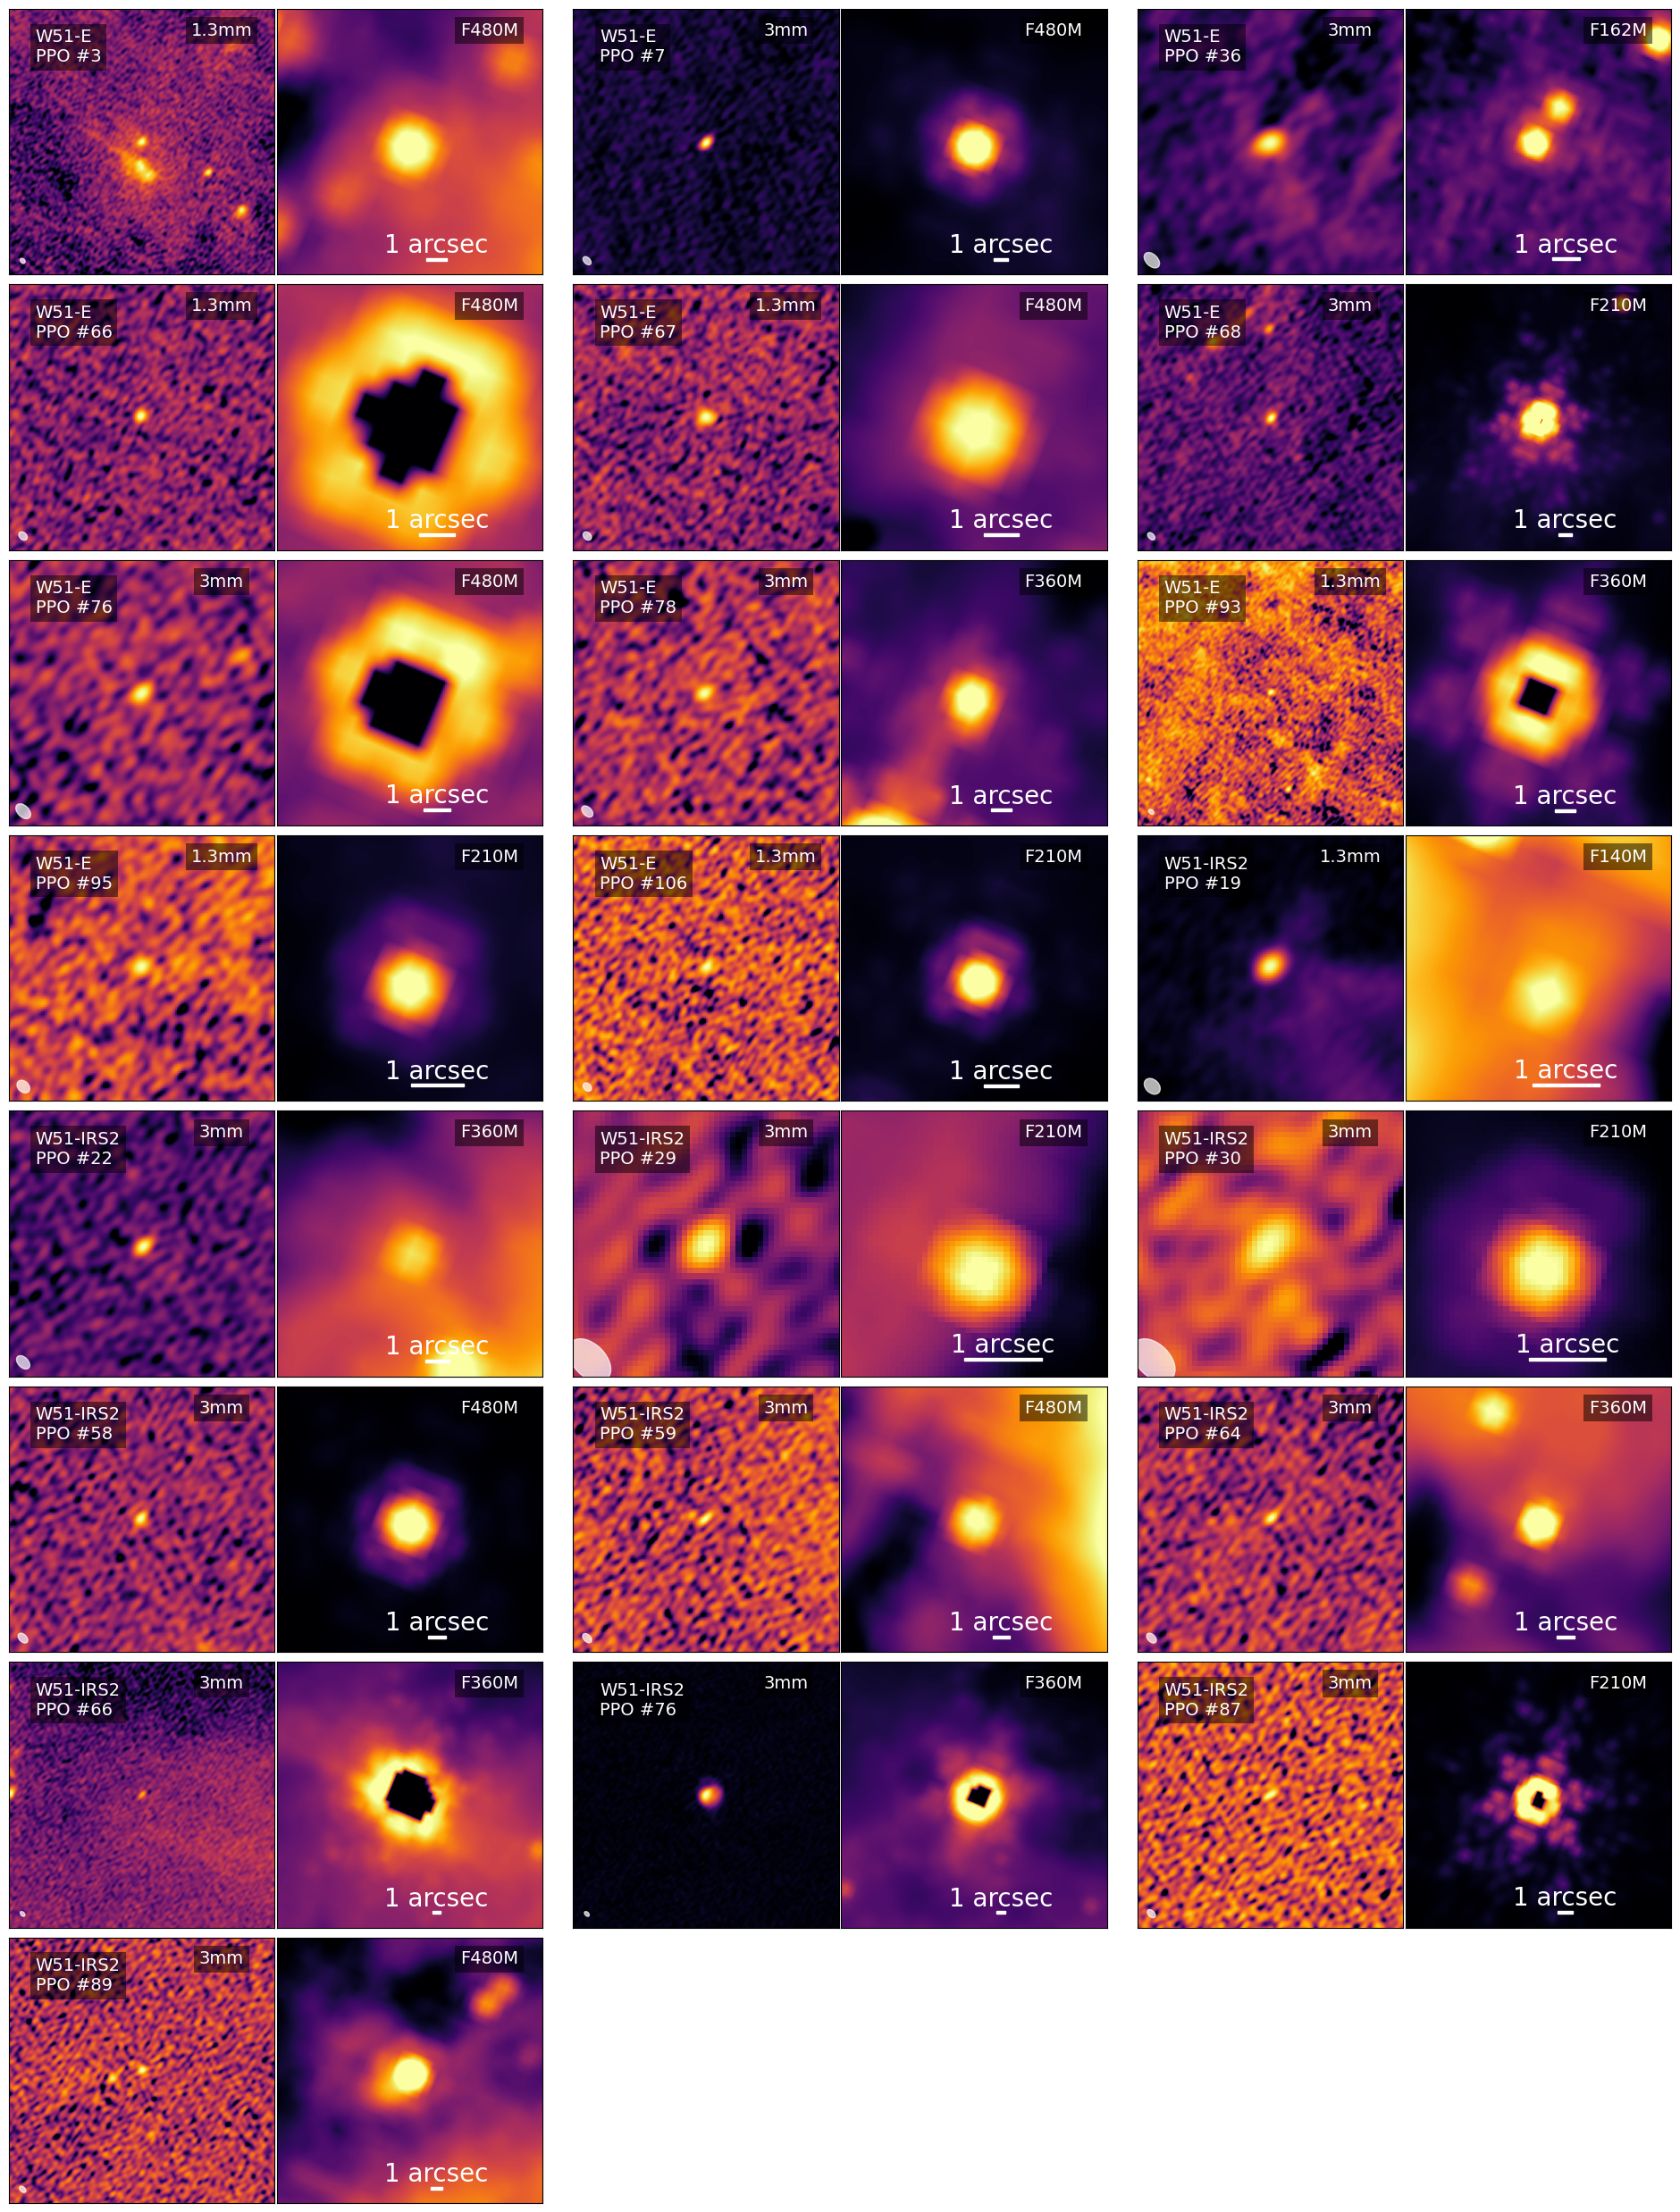

In [4]:
from astropy.wcs.utils import proj_plane_pixel_scales

import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata.utils import Cutout2D
from astropy.wcs import WCS
import regions
import numpy as np
from radio_beam import Beam
from matplotlib.patches import Rectangle, Ellipse
from astropy.visualization import simple_norm
import matplotlib.gridspec as gridspec
from regions import RectangleSkyRegion
from astropy.coordinates import SkyCoord
import astropy.units as u
import sys
sys.path.append('/home/t.yoo/Paths')
import Paths.Paths as paths

Path = paths.filepaths()

def add_scalebar(ax, xpos, ypos, length, pixel_scale, label=None, color='white', fontsize=20, bbox=False, pad=0.05, thickness=5):

    scaled_length = (length / pixel_scale).to(u.deg/u.deg)
    print(scaled_length)
    ax.add_patch(Rectangle((xpos-scaled_length.value/2, ypos), scaled_length.value, thickness, color=color))
    if label:
        if bbox:
            ax.text(xpos, ypos + pad, label, color=color, fontsize=fontsize, ha='center', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
        else:
            ax.text(xpos, ypos + pad, label, color=color, fontsize=fontsize, ha='center')
def add_beam(ax, xpos, ypos, beam, pixel_scale):
    beam_major = (beam.major / pixel_scale).to(u.deg/u.deg)
    beam_minor = (beam.minor / pixel_scale).to(u.deg/u.deg)
    beam_pa = beam.pa.to(u.deg).value
    print(beam_major, beam_minor, beam_pa)
    ax.add_patch(Ellipse((xpos - 0.1*ax.get_xlim()[1], ypos - 0.1*ax.get_ylim()[1]), beam_major.value, beam_minor.value, angle=90-beam_pa, edgecolor='white', facecolor='white', alpha=0.7))

alma_dict = {'w51e': {'b6': Path.w51e_b6_tt0, 'b3': Path.w51e_b3_tt0},
            'w51n': {'b6': Path.w51n_b6_tt0, 'b3': Path.w51n_b3_tt0},}
jwst_dict={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F300M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",
    
}

jwst_dict = { "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F300M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",}

region_dir = '/home/t.yoo/w51/w51_jwst_sources_highlight/regions/'  # region files named after alma_overlap_list_sorted

# Example: alma_overlap_list_sorted = ['alma_overlap_w51e#1', 'alma_overlap_w51e#2', ...]
n_regions = len(alma_overlap_list_sorted)
ncols = 6
nrows = int(np.ceil(n_regions/3))
width_ratios = [1, 1, 0.15, 1, 1, 0.15, 1, 1]

fig = plt.figure(figsize=(4*ncols, 4*nrows))
gs = gridspec.GridSpec(nrows, ncols + 2, width_ratios=[1,1,0.1,1,1,0.1,1,1], wspace=0.01,hspace=0.01, figure=fig)

idxlist=[]
for i, region_name in enumerate(alma_overlap_list_sorted):

    row = i // 3
    pair = i % 3
    # Calculate the column index, skipping the gap columns
    col_alma = pair * 3
    col_jwst = col_alma + 1

    ax_alma = fig.add_subplot(gs[row, col_alma])
    ax_jwst = fig.add_subplot(gs[row, col_jwst])
    # Load region file
    regfile = f"{region_dir}/{region_name}.reg"
    reg = regions.Regions.read(regfile)[0]
    ppo_idx = get_number_after_hash(region_name)

    if alma_band_sorted[i] == 'b6':
        almatext = '1.3mm'
   
    elif alma_band_sorted[i] == 'b3':
        almatext = '3mm'
    w51reg = region_name[13:17]
    if w51reg == 'w51e':
        ppo_cat = Table.read(Path.w51e_dendro_matched_catalog_new)
    elif w51reg == 'w51n':
        ppo_cat = Table.read(Path.w51n_dendro_matched_catalog_new)
    center = SkyCoord(ra=ppo_cat['ra'][int(ppo_idx)], dec=ppo_cat['dec'][int(ppo_idx)],unit='deg', frame='icrs')
    square_size = min(reg.width, reg.height)
    reg = RectangleSkyRegion(center=center, width=square_size, height=square_size, angle=reg.angle)


    

    
    # ALMA
    alma_file = alma_dict[w51reg][alma_band_sorted[i]]
    alma_hdu = fits.open(alma_file)[0]
    alma_wcs = WCS(alma_hdu.header, naxis=2)
    alma_image = alma_hdu.data
    if len(alma_image.shape)!=2:
        alma_image = alma_hdu.data[0][0]  # Assuming the data is in the first extension
    cutout_alma = Cutout2D(alma_image, center, reg.width, wcs=alma_wcs)
    norm1 = simple_norm(cutout_alma.data, stretch='asinh', min_percent=1, max_percent=99.99)
    ax_alma.imshow(cutout_alma.data, origin='lower', cmap='inferno', norm=norm1)

    if len(str(ppo_idx))==4:
        ppo_idx = ppo_idx[:2]+', '+ppo_idx[2:]
    if w51reg=='w51e':
        almalabel = f"W51-E\nPPO #{ppo_idx}"

    elif w51reg=='w51n':
        almalabel = f"W51-IRS2\nPPO #{ppo_idx}"

    ax_alma.text(0.1, 0.8, almalabel, transform=ax_alma.transAxes, ha='left', fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
    ax_alma.text(0.8, 0.9, almatext, transform=ax_alma.transAxes, ha='center', fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
    beam = Beam.from_fits_header(alma_hdu.header)
    wcs_alma = WCS(alma_hdu.header,naxis=2)
    pixel_scale_alma = wcs_alma.proj_plane_pixel_scales()[0]
    add_beam(ax_alma,0.15*cutout_alma.data.shape[1], 0.15*cutout_alma.data.shape[0],beam, pixel_scale_alma)
    # mark the center
    #ax_alma.scatter(0.5*cutout_alma.data.shape[1], 0.5*cutout_alma.data.shape[0], color='cyan', s=100, marker='x')

    # JWST

    jwst_file = f'/orange/adamginsburg/jwst/w51/reproject_to_alma/{jwst_filt_sorted[i]}_reprojected_to_alma_{w51reg}_{alma_band_sorted[i]}.fits'
    jwst_hdu = fits.open(jwst_file)[0]
    jwst_wcs = WCS(jwst_hdu.header)
    cutout_jwst = Cutout2D(jwst_hdu.data, center, reg.width, wcs=jwst_wcs)
    norm2 = simple_norm(cutout_jwst.data, stretch='asinh', min_percent=1, max_percent=99)
    ax_jwst.imshow(cutout_jwst.data, origin='lower', cmap='inferno', norm=norm2)
    ax_jwst.text(0.8, 0.9, jwst_filt_sorted[i].upper(), transform=ax_jwst.transAxes, ha='center', fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
    #ax_jwst.scatter(0.5*cutout_jwst.data.shape[1], 0.5*cutout_jwst.data.shape[0], color='cyan', s=100, marker='x')

    #ax_jwst.set_title(f"{region_name} JWST")
    
    # Optional: remove ticks
    ax_alma.set_xticks([])
    ax_alma.set_yticks([])
    ax_jwst.set_xticks([])
    ax_jwst.set_yticks([])
    add_scalebar(ax_jwst, 0.6* cutout_jwst.data.shape[1], 0.05*cutout_jwst.data.shape[0], 0.1*u.arcsec, proj_plane_pixel_scales(jwst_wcs)[0]*u.deg, label='1 arcsec', color='white', fontsize=20, pad=0.03*cutout_jwst.data.shape[0], thickness=0.01*cutout_jwst.data.shape[0])

    idxlist.append(int(ppo_idx))

plt.tight_layout()
plt.savefig('plots/alma_overlapping.png', dpi=100, bbox_inches='tight')
plt.show()





[3.17219169 0.58456388 1.80259455 1.22780955 2.64898919 2.06029967
 0.         0.         0.         0.         0.         1.75213702
 2.0953446  0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False False False False False]
[False False False False False False False False  True  True  True False
 False False False False False False False False False False]
[False False False False False False  True  True False False False False
 False  True  True  True  True  True  True  True  True  True]
22
[3.17219169 0.58456388 1.80259455 1.22780955 2.64898919 2.06029967
 1.75213702 2.0953446 ]


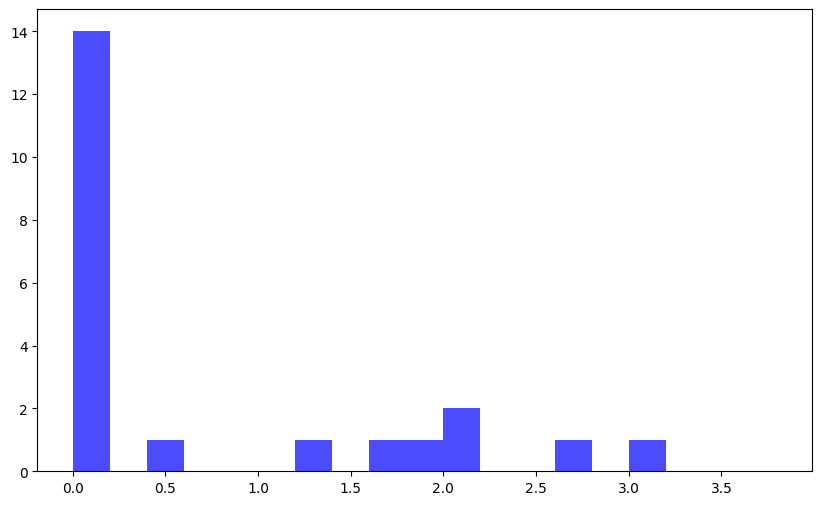

In [5]:
def get_si_from_list(reglist):
    si_list = []
    isoverlap_list = []
    b3flux_list = []
    b6flux_list = []
    for reg in reglist:
        match = re.search(r'#(\d+)', reg)
        if match:
            idx = int(match.group(1))
        else:
            idx = None
        region = reg[13:17]
        if region=='w51e':
            ppocat = Table.read(Path.w51e_dendro_matched_catalog_new)
        elif region=='w51n':
            ppocat = Table.read(Path.w51n_dendro_matched_catalog_new)
        si = ppocat['alpha'][idx]
        isoverlap = ppocat['is_overlap'][idx]
        b3flux = ppocat['flux_peak_b3'][idx]
        b6flux = ppocat['flux_peak_b6'][idx]
        si_list.append(si.item())
        isoverlap_list.append(isoverlap.item())
        b3flux_list.append(b3flux.item())
        b6flux_list.append(b6flux.item())
    return np.array(si_list), np.array(isoverlap_list), b3flux_list, b6flux_list

si_list, isoverlap_list, b3flux_list, b6flux_list = get_si_from_list(alma_overlap_list_sorted)
print(si_list)
print(isoverlap_list)
print(np.array(b3flux_list)==0)
print(np.array(b6flux_list)==0)
fig = plt.figure(figsize=(10, 6))
plt.hist(si_list[np.isfinite(si_list)], bins=np.arange(0, 4, 0.2), color='blue', alpha=0.7)
print(len(si_list))
print(si_list[si_list>0])

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


6.829458288848782 5.0046760588892 -45.90349197388
25.000000000002498
9.442004774299301 5.97718145166308 -44.76537322998
14.285714285717551
9.442004774299301 5.97718145166308 -44.76537322998
14.285714285717551


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


6.829458288848782 5.0046760588892 -45.90349197388
25.000000000002498
6.829458288848782 5.0046760588892 -45.90349197388
25.000000000002498


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


9.442004774299301 5.97718145166308 -44.76537322998
14.285714285717551
9.442004774299301 5.97718145166308 -44.76537322998
14.285714285717551
9.442004774299301 5.97718145166308 -44.76537322998
14.285714285717551
6.829458288848782 5.0046760588892 -45.90349197388
25.000000000002498


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


6.829458288848782 5.0046760588892 -45.90349197388
25.000000000002498
6.829458288848782 5.0046760588892 -45.90349197388
25.000000000002498
6.842871196568784 4.9993209540851 -46.15486526489
25.000000000002498
9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551
9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


9.436709540234157 5.973831883497936 -44.635887146
14.285714285717551


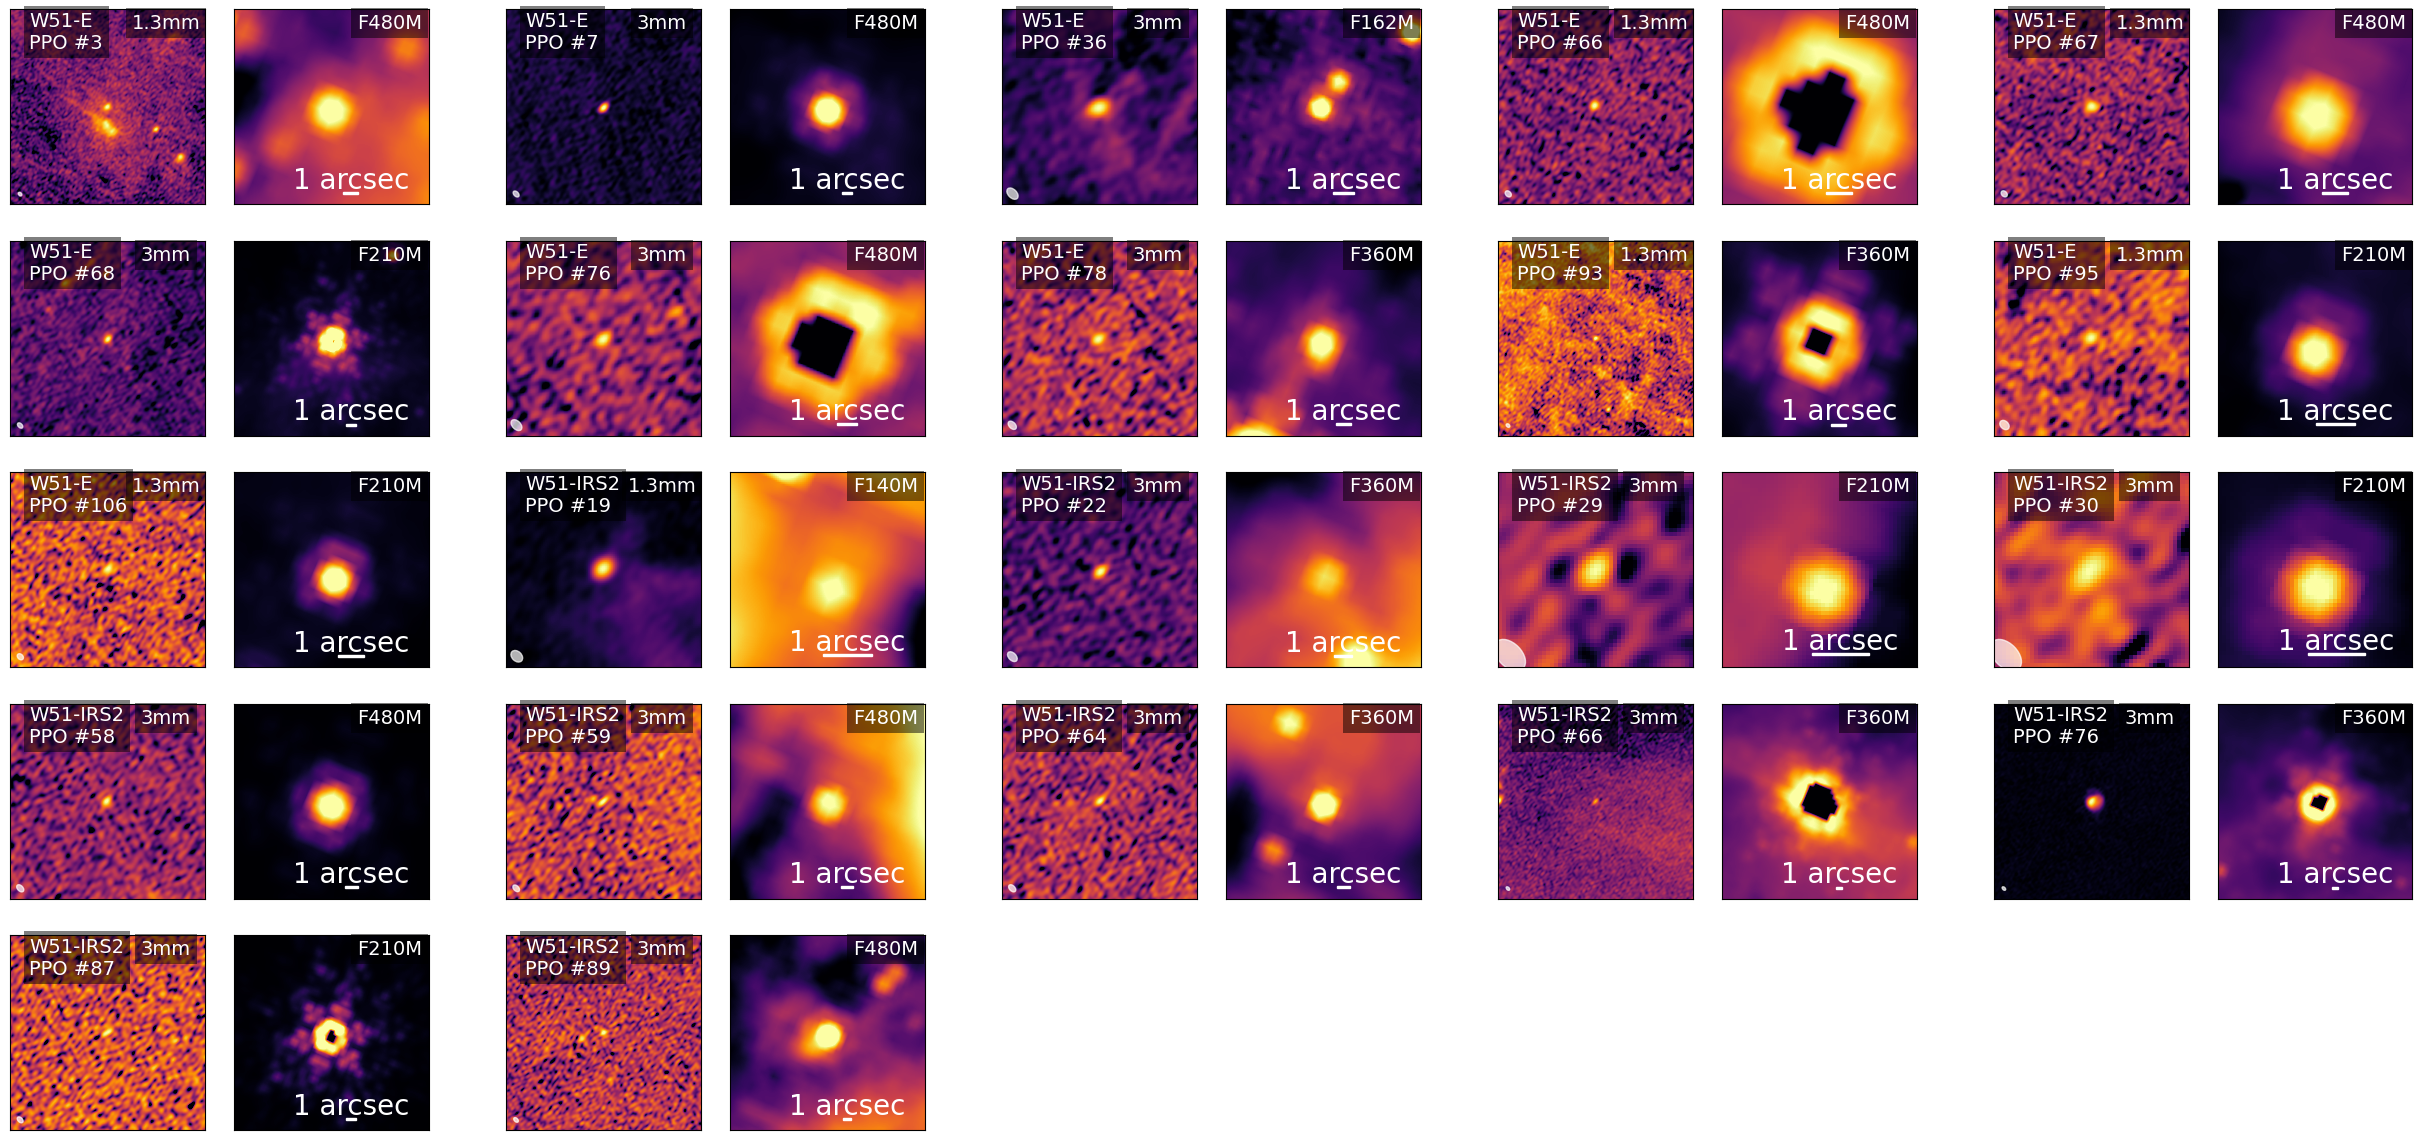

In [8]:
ncols = 10+4  # 2 columns per source (ALMA, JWST)
n_sources_per_row = 5
nrows = int(np.ceil(len(alma_overlap_list_sorted) / n_sources_per_row))

fig = plt.figure(figsize=(31,15))
gs = gridspec.GridSpec(nrows, ncols, width_ratios=[1,1,0.1,1,1,0.1,1,1,0.1,1,1,0.1,1,1], hspace=0.01, figure=fig)

for i, region_name in enumerate(alma_overlap_list_sorted):
    row = i // n_sources_per_row
    source_in_row = i % n_sources_per_row
    col_alma = source_in_row * 3
    col_jwst = col_alma + 1

    ax_alma = fig.add_subplot(gs[row, col_alma])
    ax_jwst = fig.add_subplot(gs[row, col_jwst])
    # Load region file
    regfile = f"{region_dir}/{region_name}.reg"
    reg = regions.Regions.read(regfile)[0]
    ppo_idx = get_number_after_hash(region_name)

    if alma_band_sorted[i] == 'b6':
        almatext = '1.3mm'
   
    elif alma_band_sorted[i] == 'b3':
        almatext = '3mm'
    w51reg = region_name[13:17]
    if w51reg == 'w51e':
        ppo_cat = Table.read(Path.w51e_dendro_matched_catalog_new)
    elif w51reg == 'w51n':
        ppo_cat = Table.read(Path.w51n_dendro_matched_catalog_new)
    center = SkyCoord(ra=ppo_cat['ra'][int(ppo_idx)], dec=ppo_cat['dec'][int(ppo_idx)],unit='deg', frame='icrs')
    square_size = min(reg.width, reg.height)
    reg = RectangleSkyRegion(center=center, width=square_size, height=square_size, angle=reg.angle)

    alma_file = alma_dict[w51reg][alma_band_sorted[i]]
    alma_hdu = fits.open(alma_file)[0]
    alma_wcs = WCS(alma_hdu.header, naxis=2)
    alma_image = alma_hdu.data
    if len(alma_image.shape)!=2:
        alma_image = alma_hdu.data[0][0]  # Assuming the data is in the first extension
    cutout_alma = Cutout2D(alma_image, center, reg.width, wcs=alma_wcs)
    norm1 = simple_norm(cutout_alma.data, stretch='asinh', min_percent=1, max_percent=99.99)
    ax_alma.imshow(cutout_alma.data, origin='lower', cmap='inferno', norm=norm1)

    if len(str(ppo_idx))==4:
        ppo_idx = ppo_idx[:2]+', '+ppo_idx[2:]
    if w51reg=='w51e':
        almalabel = f"W51-E\nPPO #{ppo_idx}"

    elif w51reg=='w51n':
        almalabel = f"W51-IRS2\nPPO #{ppo_idx}"

    ax_alma.text(0.1, 0.8, almalabel, transform=ax_alma.transAxes, ha='left', fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
    ax_alma.text(0.8, 0.9, almatext, transform=ax_alma.transAxes, ha='center', fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
    beam = Beam.from_fits_header(alma_hdu.header)
    wcs_alma = WCS(alma_hdu.header,naxis=2)
    pixel_scale_alma = wcs_alma.proj_plane_pixel_scales()[0]
    add_beam(ax_alma,0.15*cutout_alma.data.shape[1], 0.15*cutout_alma.data.shape[0],beam, pixel_scale_alma)
    # mark the center
    #ax_alma.scatter(0.5*cutout_alma.data.shape[1], 0.5*cutout_alma.data.shape[0], color='cyan', s=100, marker='x')

    # JWST

    jwst_file = f'/orange/adamginsburg/jwst/w51/reproject_to_alma/{jwst_filt_sorted[i]}_reprojected_to_alma_{w51reg}_{alma_band_sorted[i]}.fits'
    jwst_hdu = fits.open(jwst_file)[0]
    jwst_wcs = WCS(jwst_hdu.header)
    cutout_jwst = Cutout2D(jwst_hdu.data, center, reg.width, wcs=jwst_wcs)
    norm2 = simple_norm(cutout_jwst.data, stretch='asinh', min_percent=1, max_percent=99)
    ax_jwst.imshow(cutout_jwst.data, origin='lower', cmap='inferno', norm=norm2)
    ax_jwst.text(0.8, 0.9, jwst_filt_sorted[i].upper(), transform=ax_jwst.transAxes, ha='center', fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
    #ax_jwst.scatter(0.5*cutout_jwst.data.shape[1], 0.5*cutout_jwst.data.shape[0], color='cyan', s=100, marker='x')

    #ax_jwst.set_title(f"{region_name} JWST")
    
    # Optional: remove ticks
    ax_alma.set_xticks([])
    ax_alma.set_yticks([])
    ax_jwst.set_xticks([])
    ax_jwst.set_yticks([])
    add_scalebar(ax_jwst, 0.6* cutout_jwst.data.shape[1], 0.05*cutout_jwst.data.shape[0], 0.1*u.arcsec, proj_plane_pixel_scales(jwst_wcs)[0]*u.deg, label='1 arcsec', color='white', fontsize=20, pad=0.03*cutout_jwst.data.shape[0], thickness=0.01*cutout_jwst.data.shape[0])

    idxlist.append(int(ppo_idx))

plt.show()


Set DATE-AVG to '2025-05-06T16:59:22.406' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


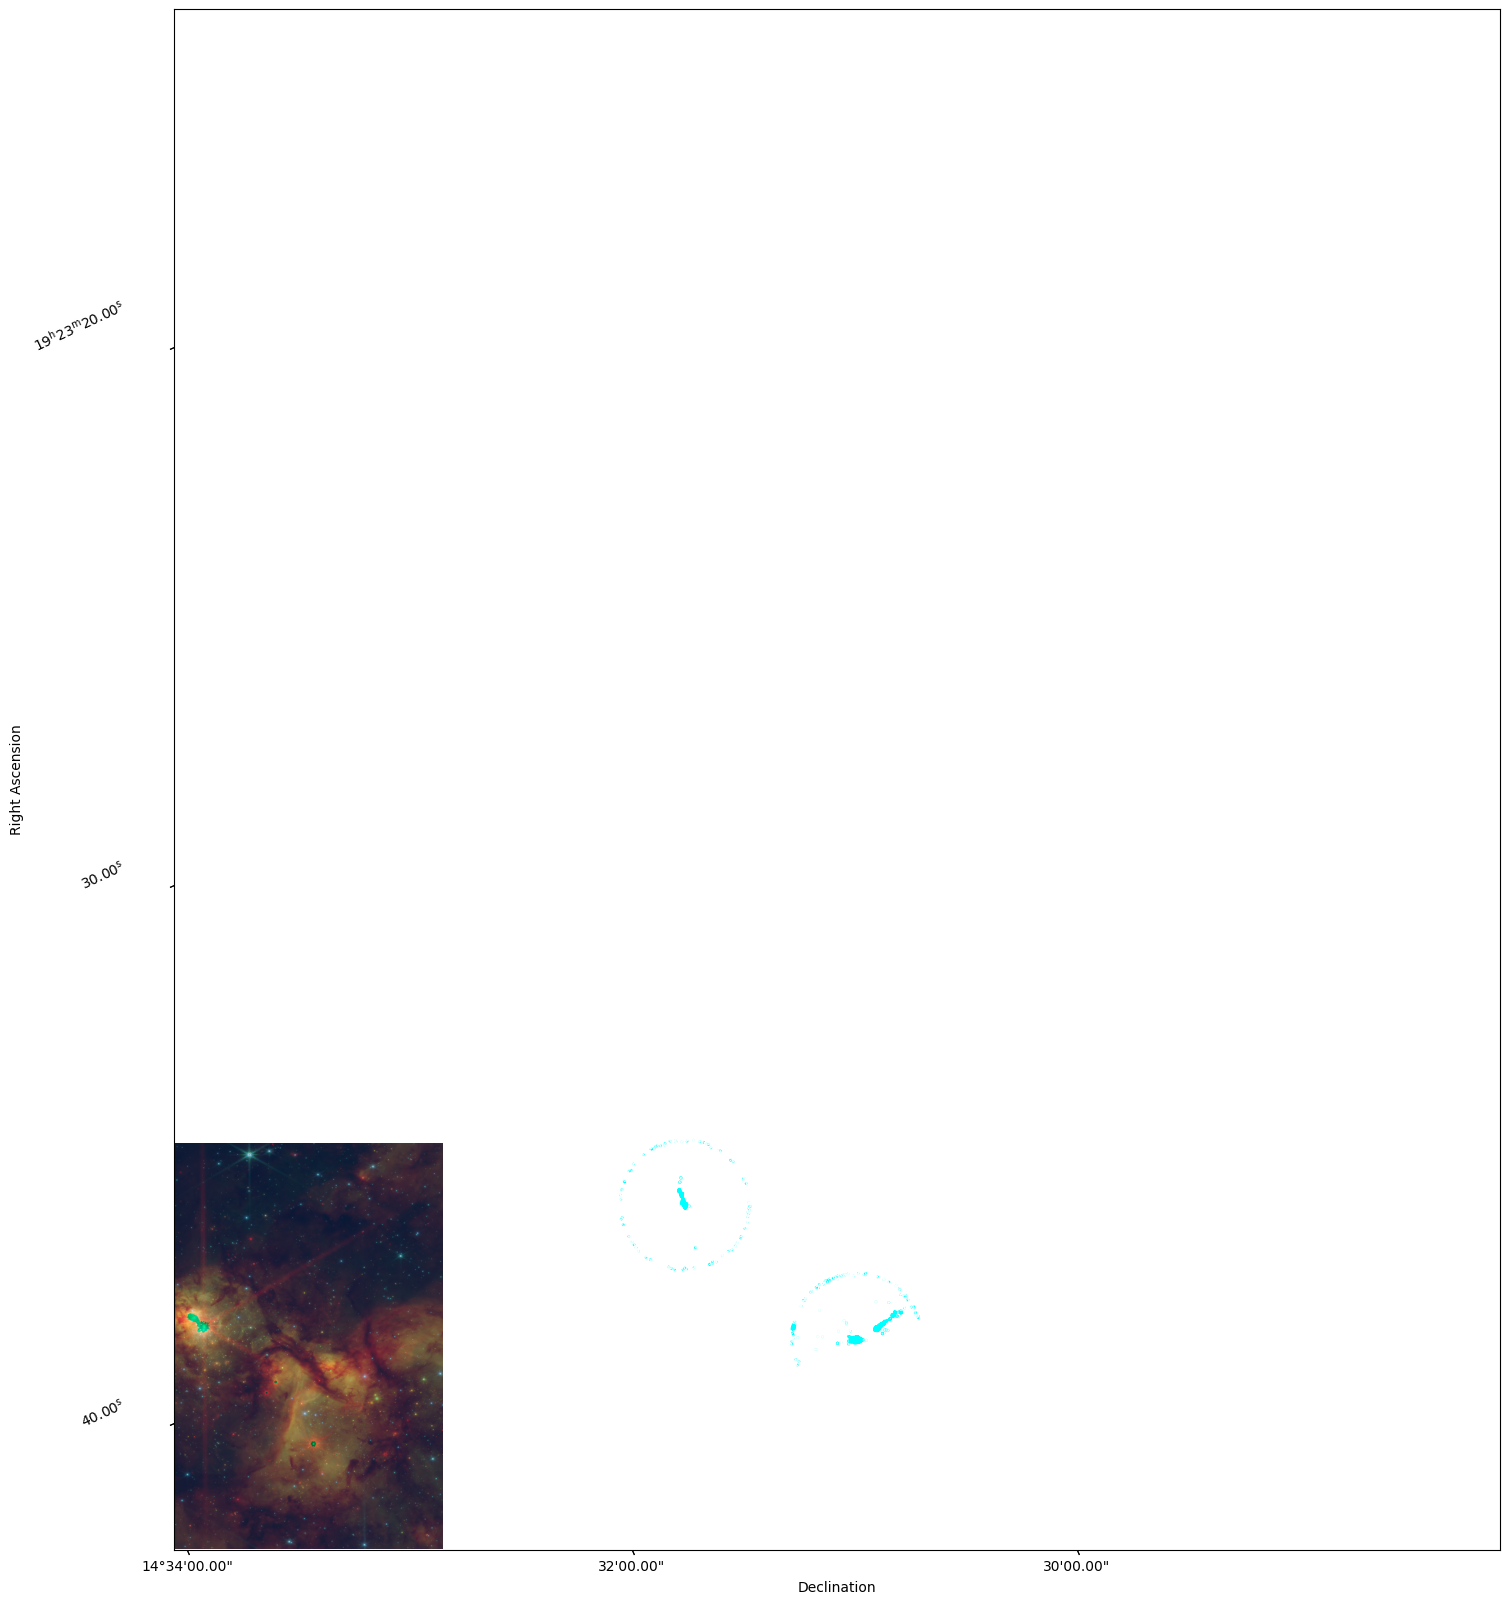

In [7]:
from matplotlib.colors import LinearSegmentedColormap
from astropy.visualization import simple_norm
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from regions import Regions
import os
def make_rgb_image(repr480_image_filenames, filt1, filt2, filt3, cutout_region=None,
    alpha_red=0.7, alpha_green=0.78, alpha_blue=0.74, 
    figsize=(48,20),
    vmin_img1=-2.12, vmax_img1=3987, vmin_img2=-2.12, vmax_img2=2409, vmin_img3=-2.12, vmax_img3=798, 
    color_scheme='rgb', stretch='log'):
    """
    Create an RGB image from three filters.
    """
    img1 = fits.getdata(repr480_image_filenames[filt1])
    img2 = fits.getdata(repr480_image_filenames[filt2])
    img3 = fits.getdata(repr480_image_filenames[filt3])

    ref_fits = fits.open(repr480_image_filenames['f480m'])
    tgt_header = fits.getheader(repr480_image_filenames['f480m'], ext=('SCI', 1))

    wcs_header = WCS(tgt_header)
    if color_scheme == 'rgb':
        cmap1 = LinearSegmentedColormap.from_list('red', [(0, 0, 0), (1, 0, 0)])
        cmap2 = LinearSegmentedColormap.from_list('green', [(0, 0, 0), (0, 1, 0)])
        cmap3 = LinearSegmentedColormap.from_list('blue', [(0, 0, 0), (0, 0, 1)])
    elif color_scheme == 'cmyk':
        cmap1 = LinearSegmentedColormap.from_list('magenta', [(0, 0, 0), (1, 0, 1)])
        cmap2 = LinearSegmentedColormap.from_list('yellow', [(0, 0, 0), (1, 1, 0)])
        cmap3 = LinearSegmentedColormap.from_list('cyan', [(0, 0, 0), (0, 1, 1)])

    if cutout_region is not None:
        from regions import Regions
        from astropy.nddata import Cutout2D
      
        cutout1 = Cutout2D(img1, cutout_region.center, (cutout_region.width, cutout_region.height), wcs=wcs_header)
        cutout2 = Cutout2D(img2, cutout_region.center, (cutout_region.width, cutout_region.height), wcs=wcs_header)
        cutout3 = Cutout2D(img3, cutout_region.center, (cutout_region.width, cutout_region.height), wcs=wcs_header) 
        img1 = cutout1.data
        img2 = cutout2.data
        img3 = cutout3.data

    if stretch == 'log':
        norm1 = simple_norm(img1, stretch='log', vmin=vmin_img1, vmax=vmax_img1)
        norm2 = simple_norm(img2, stretch='log', vmin=vmin_img2, vmax=vmax_img2)
        norm3 = simple_norm(img3, stretch='log', vmin=vmin_img3, vmax=vmax_img3)
    elif stretch == 'linear':
        norm1 = simple_norm(img1, stretch='linear', vmin=vmin_img1, vmax=vmax_img1)
        norm2 = simple_norm(img2, stretch='linear', vmin=vmin_img2, vmax=vmax_img2)
        norm3 = simple_norm(img3, stretch='linear', vmin=vmin_img3, vmax=vmax_img3)

    color1_rgb = cmap1(norm1(img1))[...,:3] * alpha_red
    color2_rgb  = cmap2(norm2(img2))[...,:3]  * alpha_green
    color3_rgb    = cmap3(norm3(img3))[...,:3]    * alpha_blue

    composite = color1_rgb + color2_rgb + color3_rgb
    composite = np.clip(composite, 0, 1)

    fig = plt.figure(figsize=figsize )
    ax = fig.add_subplot(111, projection=wcs_header)

    ax.imshow(composite, origin='lower', )
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')


    ra = lon = ax.coords['ra']
    dec = lat = ax.coords['dec']
    ra.set_major_formatter('hh:mm:ss.ss')
    dec.set_major_formatter('dd:mm:ss.ss')
    ra.set_axislabel('Right Ascension')
    ra.set_ticklabel(rotation=25, pad=30)
    dec.set_axislabel('Declination')
    
    ra.set_ticks_position('l')
    ra.set_ticklabel_position('l')
    ra.set_axislabel_position('l')
    dec.set_ticks_position('b')
    dec.set_ticklabel_position('b')
    dec.set_axislabel_position('b')

    return fig, ax, composite, cutout1.wcs

image_filenames ={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F335M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",
    "f405n-f410m": "/orange/adamginsburg/jwst/w51/filter_subtractions/f405n_minus_f410m.fits",
    "f187n-f182m": "/orange/adamginsburg/jwst/w51/filter_subtractions/f187n_minus_f182m.fits",


}

image_sub_filenames = {
    "f405n-f410m": "/orange/adamginsburg/jwst/w51/F405_minus_F410.fits",
    "f410m-f405n": "/orange/adamginsburg/jwst/w51/F410_minus_F405_fractional_bandwidth_pipeline_v0.1.fits",
    "f187n-f182m": "/orange/adamginsburg/jwst/w51/F187_minus_F182cont_pipeline_v0.1.fits",

}


reproj_dir = '/orange/adamginsburg/jwst/w51/data_reprojected/'
repr140_image_filenames = {x: y.replace("i2d", "i2d_reprj_f140") for x,y in image_filenames.items()}
repr140_image_filenames = {x: (reproj_dir+os.path.basename(y)) for x,y in repr140_image_filenames.items()}

cutout_reg = Regions.read(f"{region_dir}/alma_overlap_cutout.reg")[0]


fig, ax, rgbimage_overview, overview_wcs = make_rgb_image(repr140_image_filenames, 'f480m', 'f210m', 'f140m', alpha_red=1, alpha_green=1, alpha_blue=1, figsize=(48,20),
vmin_img1=0.09660550444184562, vmax_img1=9185.30422255537, vmin_img2=-1.221155232132053, vmax_img2=1901.7755108099539, vmin_img3=-2.812234960531762, vmax_img3=1036.2059405729317, cutout_region=cutout_reg)




cutout_reg_almacoords = Regions.read(f"{region_dir}/alma_overlap_cutout_almacoords.reg")[0]

w51e_b6_image = fits.getdata(Path.w51e_b6_tt0)
if w51e_b6_image.ndim > 2:
    w51e_b6_image = np.squeeze(w51e_b6_image)
w51n_b6_image = fits.getdata(Path.w51n_b6_tt0)
if w51n_b6_image.ndim > 2:
    w51n_b6_image = np.squeeze(w51n_b6_image)
w51e_b6_wcs = WCS(fits.getheader(Path.w51e_b6_tt0), naxis=2)
w51n_b6_wcs = WCS(fits.getheader(Path.w51n_b6_tt0), naxis=2)
cutout_w51e_b6 = Cutout2D(w51e_b6_image, cutout_reg_almacoords.center, (cutout_reg_almacoords.width, cutout_reg_almacoords.height), wcs=w51e_b6_wcs)
cutout_w51n_b6 = Cutout2D(w51n_b6_image, cutout_reg_almacoords.center, (cutout_reg_almacoords.width, cutout_reg_almacoords.height), wcs=w51n_b6_wcs)
level_w51n_b6 = np.linspace(5e-4, 5e-4*5, 5)
level_w51e_b6 = np.linspace(5e-4, 5e-4*5, 5)

ax.contour(cutout_w51e_b6.data, levels=level_w51e_b6, colors='cyan', linewidths=2, transform=ax.get_transform(cutout_w51e_b6.wcs))
ax.contour(cutout_w51n_b6.data, levels=level_w51n_b6, colors='cyan', linewidths=2, transform=ax.get_transform(cutout_w51n_b6.wcs))


plt.savefig(f'plots/alma_overlapping_overview.png', dpi=100, bbox_inches='tight')
plt.show()
